In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy import optimize

In [71]:
x = np.linspace(28, 38, 1000)

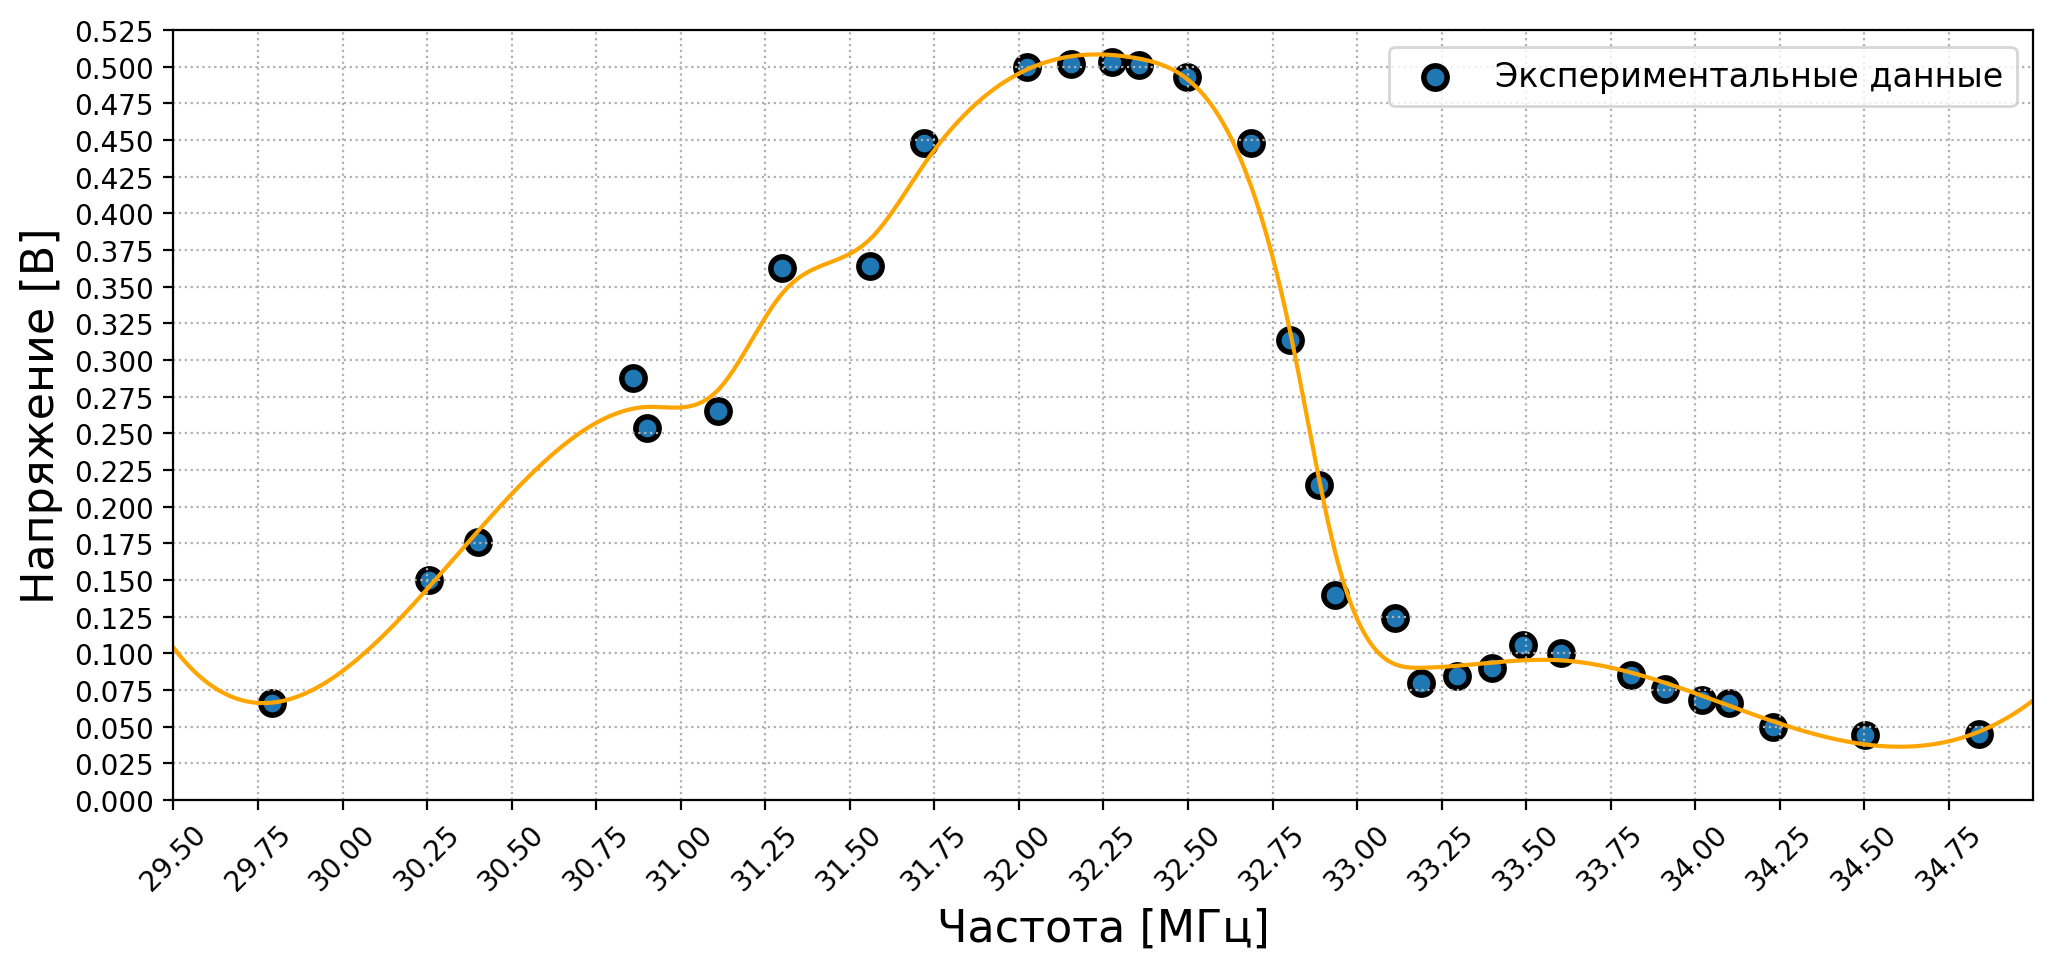

In [72]:

f = data['freq[MHz]']
v = 0.25 - data['U[V]']
order = np.argsort(f)
v, f = v[order], f[order]

interp = interpolate.UnivariateSpline(f, v, s = 0.005)
data = pd.read_csv("angle_30.csv")


plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(f, v, s = 70, edgecolors='black', linewidth = 2, label = 'Экспериментальные данные')
plt.xlabel("Частота [МГц]", fontsize = 16)
plt.ylabel("Напряжение [В]", fontsize= 16)
plt.plot(x, interp(x), color = 'orange')
plt.xticks(np.arange(29, 35, 0.25), rotation = 45)
plt.yticks(np.arange(0, 0.6, 0.025))
plt.xlim(29.5, 35)
plt.ylim(0, 0.525)
plt.grid(ls = ':')
plt.legend(fontsize = 12)

### АЧХ

(-30.0, 0.5)

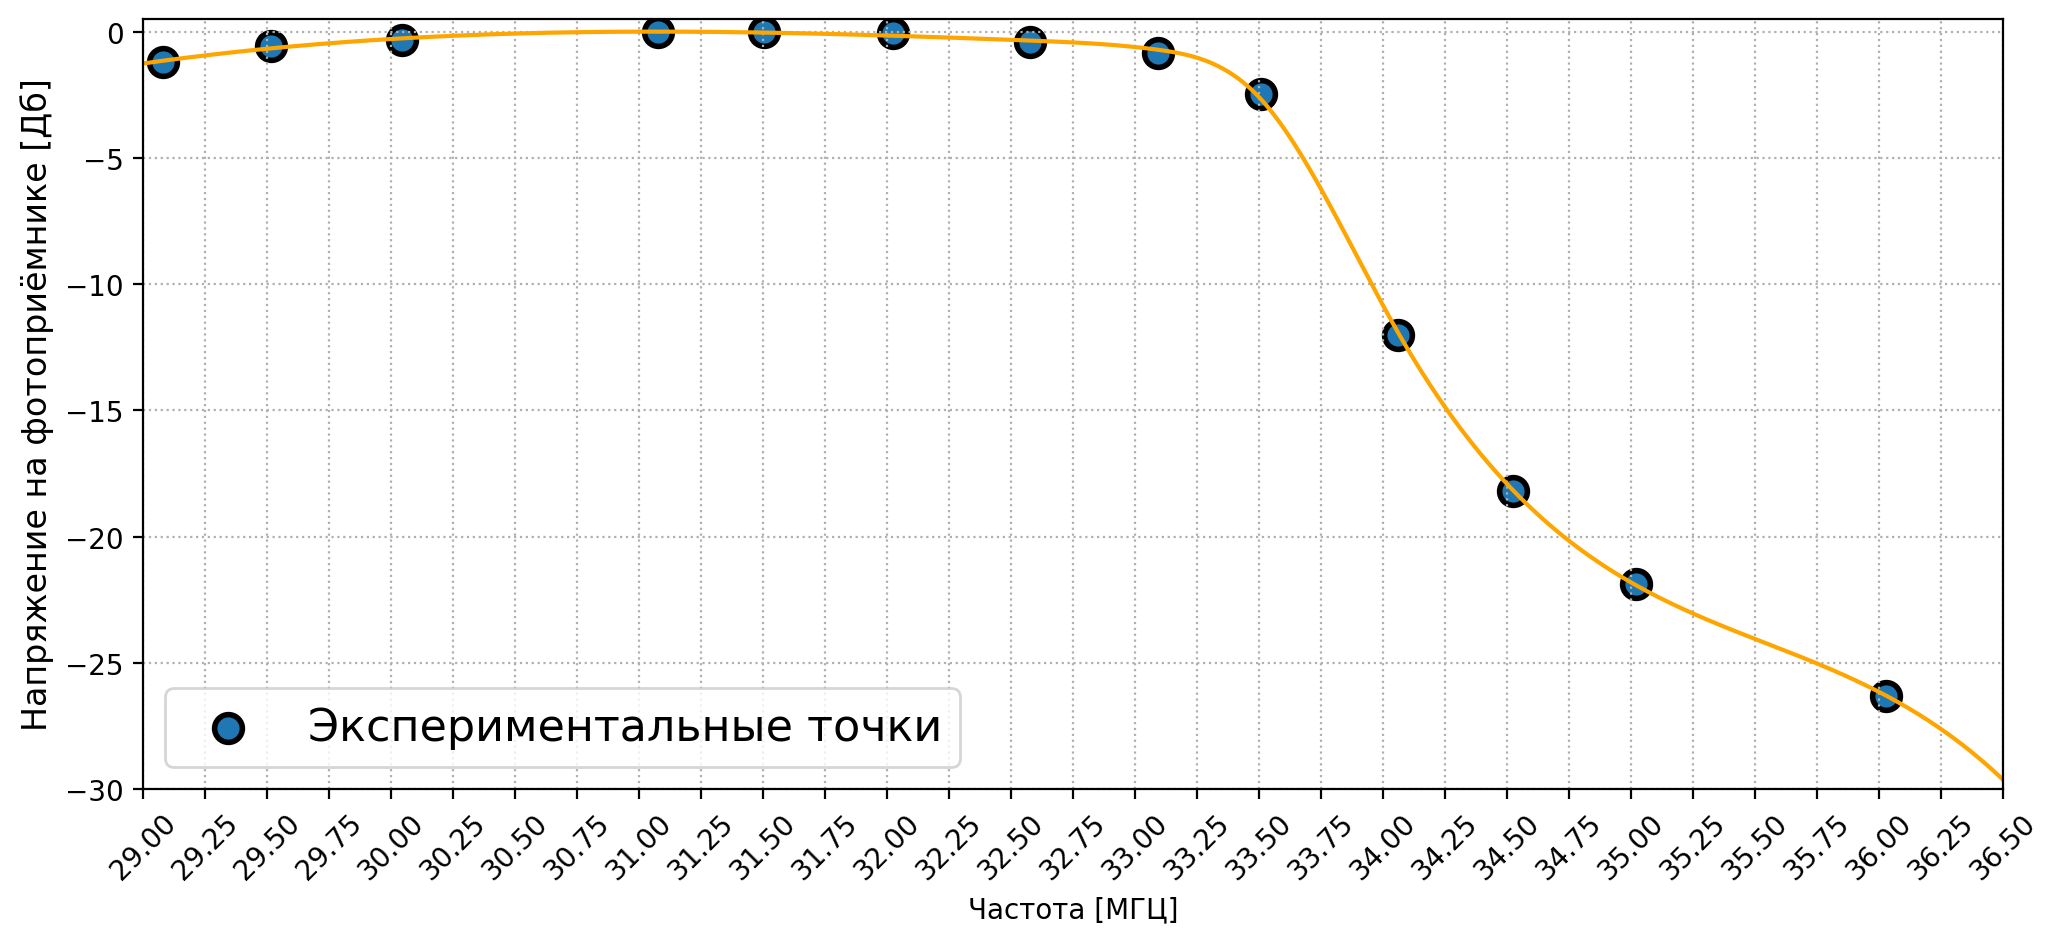

In [76]:
afr = pd.read_csv('afr.csv')
volt = 0.25 - afr['voltage[v]']
max_voltage = np.max(volt)
volt_db = 20 * np.log10(volt/ max_voltage)
afr_interp = interpolate.UnivariateSpline(afr['freq[MHz]'], volt_db, s = 0.1)

plt.figure(figsize=(12, 5), dpi = 200)
plt.scatter(afr['freq[MHz]'], volt_db, label = 'Экспериментальные точки', edgecolors='black', linewidths=2, s = 100)
plt.xlabel("Частота [МГЦ]")
plt.ylabel("Напряжение на фотоприёмнике [Дб]", fontsize = 12)
plt.xticks(np.arange(29, 38, 0.25), rotation = 45)
plt.plot(x, afr_interp(x), color = 'orange')
plt.xlim(29, 36.5)
plt.legend(fontsize = 16)
plt.grid(ls = ':')
plt.ylim(-30, 0.5)

### Напряжение от частоты(c учетом АЧХ)

Text(0, 0.5, 'напряжение [отн.ед.]')

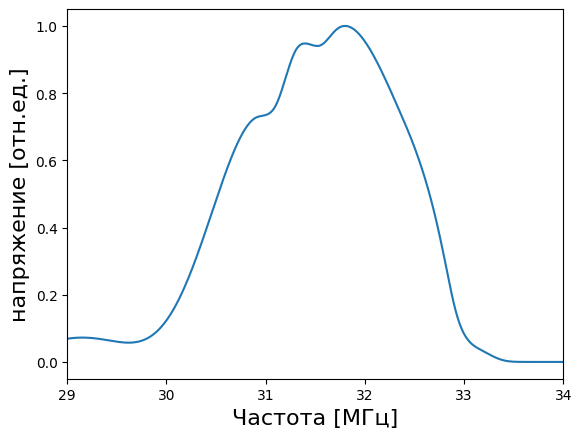

In [92]:
y =interp(x) /np.power(0.1, afr_interp(x))
y /= np.max(y)
plt.plot(x, y)
plt.xlim(29, 34)
plt.xlabel("Частота [МГц]", fontsize = 16)
plt.ylabel("напряжение [отн.ед.]", fontsize = 16)

### Последний

Text(0, 0.5, 'Напряжение на фотоприёмнике [В]')

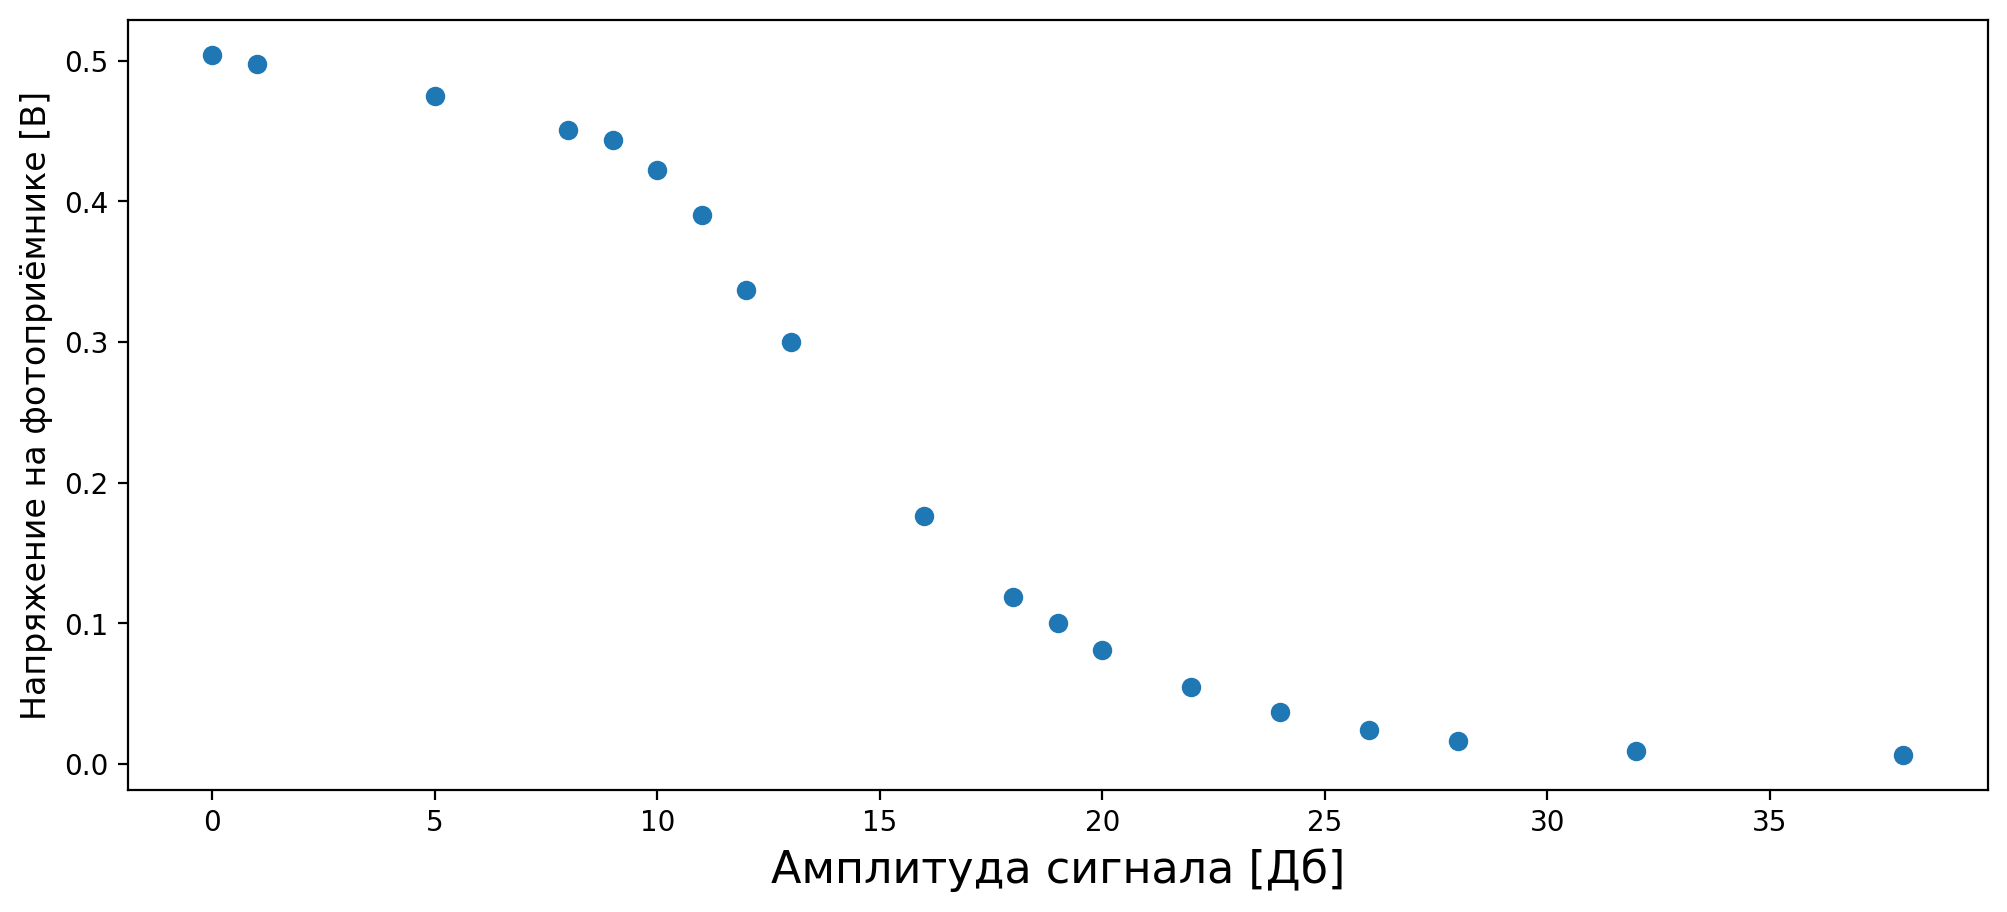

In [100]:
last = pd.read_csv('p.csv')

plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(last['p[dB]'], 0.25 - last['U[v]'])
plt.xlabel("Амплитуда сигнала [Дб]", fontsize = 16)
plt.ylabel("Напряжение на фотоприёмнике [В]", fontsize = 12)